<center>


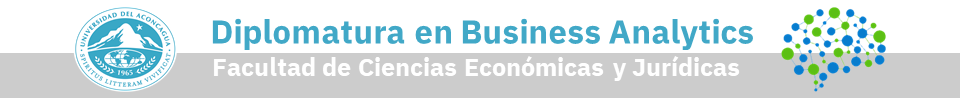

</center>

<center>
<font color="#41a8c7">
<h2><b>
Variable aleatoria-Variable discreta-Distribución binomial
</font>
</center>

**Ejercicio Nº4:** El gerente de un casino virtual, debe estimar cuáles de sus clientes tienen adicción por el juego. Esto es debido a una nueva legistación que obliga a suspender la cuenta, por un mes, a los usuarios que tienen problemas con el juego. Para ello se propone usar el algoritmo de Machine Learning, llamado Suport Machine Vector. Este algoritmo permite clasificar los usuarios en "Adicto" y "Normal". Debido a la perdida de ingreso que le puede ocasionar la suspención de cuentas se debe evaluar la precisión del algoritmo.

1.Si el algoritmo no tiene capacidad de predecir y solo adivina, ¿Cuál es el gráfico de distribución de probabilidad para una muestra de 30 usuarios?

In [1]:
n=30
p=0.5




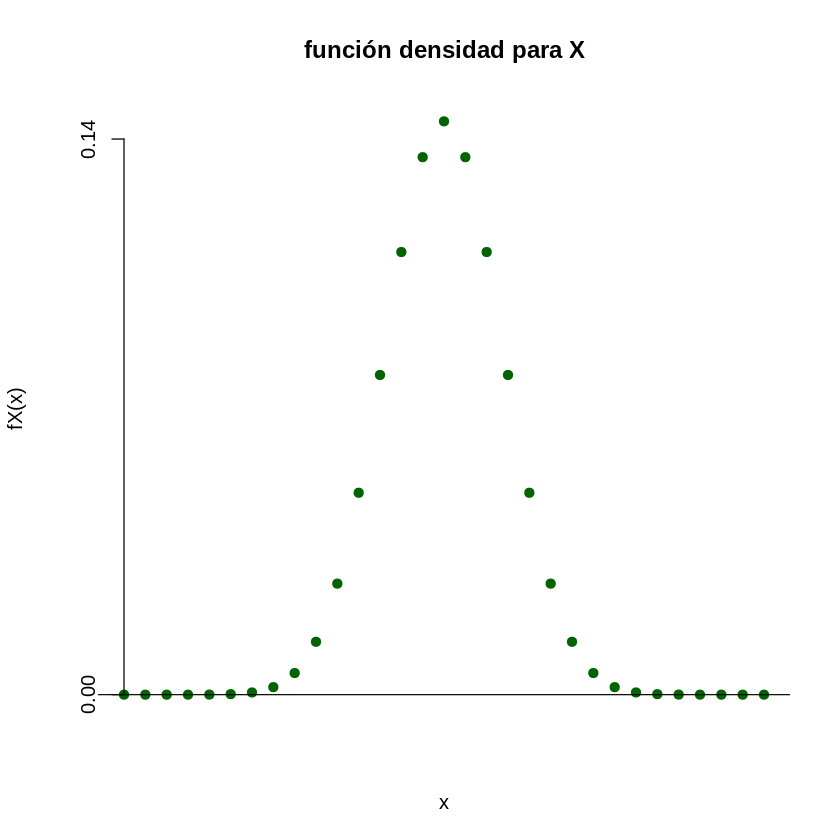

In [2]:

x=seq(0,n,1)
hx=dbinom(x,n,p)

plot(x,hx,xlab = "x", ylab = "fX(x)"
     ,main="función densidad para X"
     ,col="darkgreen"
     ,type="p"
     ,lwd=1
     ,axes=F
     ,pch=19)

axis(1, at=c(-10000,10000), pos=0) 

axis(2, at=c(0, round(max(hx),2)), pos=0) 




In [ ]:
2. ¿Cuál es el promedio de clasificación correcta?

In [ ]:
30*15

[1] 450

3.¿Cuál es la probabilidad de que pueda clasificar correctamente a más de 25 usuarios en una muestra de 30?

In [ ]:
dbinom(26,30,0.5)+dbinom(27,30,0.5)+dbinom(28,30,0.5)+dbinom(29,30,0.5)+dbinom(30,30,0.5)


[1] 2.973806e-05

Graficar

In [3]:
n=30
p=0.5

Valor inferior

In [4]:
lb=26

Valor superior

In [5]:
ub=30

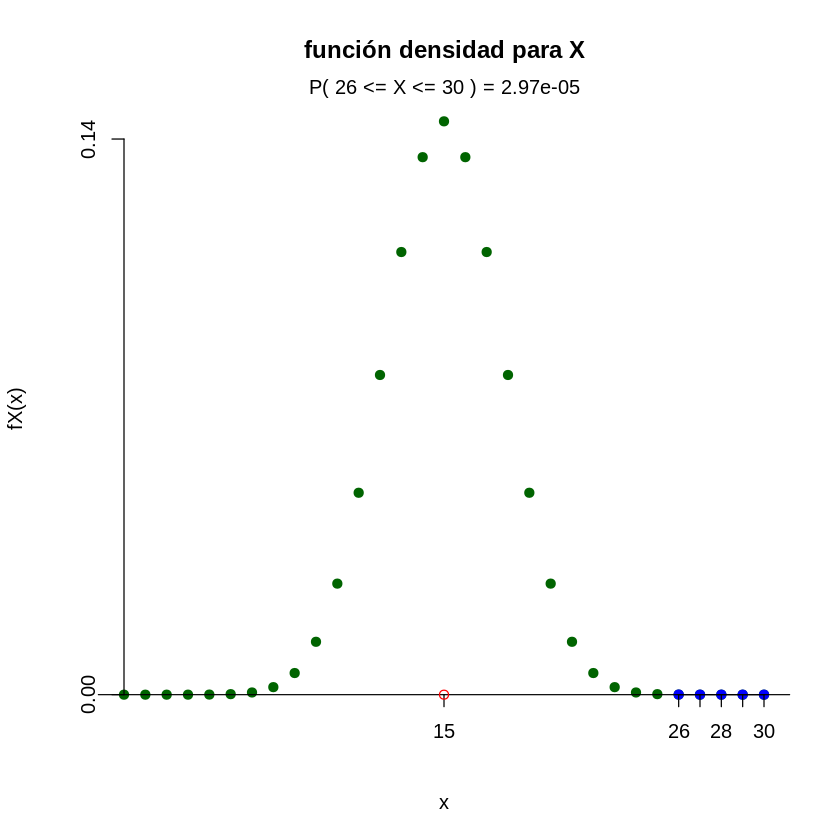

In [6]:
mean=p*n

x=seq(0,n,1)
hx=dbinom(x,n,p)


plot(x,hx,xlab = "x", ylab = "fX(x)"
     ,main="función densidad para X"
     ,col="darkgreen"
     ,type="p"
     ,lwd=1
     ,axes=F
     ,pch=19)


x=seq(lb,ub,1)

for (i in 1:length(x)){
  
  points(x[i],dbinom(x[i],n,p), col = "blue",pch=19) 
  
}



area=pbinom(ub,n,p)-pbinom(lb-1,n,p)
result=paste("P(",lb,"<= X <=",ub,") =",
             signif(area, digits=3))
mtext(result,3)



axis(1, at=c(-10000,10000), pos=0) 


axis(1, at=mean, pos=0) 
points(mean,0, col = "red",pch=1) 


axis(1, at=seq(lb,ub,1), pos=0) 


axis(2, at=c(0, round(max(hx),2)), pos=0) 


4.Se toma una muestra de 70 usuarios, de los cuales se midió la edad, el tiempo de conexión diario en la plataforma y se les preguntó si tenian problemas con el juego. Para entrenar el algoritmo divida la muestra en un grupo de 40 usuarios y determine la capacidad de clasificar con los 30 restantes. (Esta forma se medir la capacidad de estimar de un algoritmo se llama Cross-Validation)

In [ ]:
condicion=c("Normal","Normal","Adicto","Normal","Normal","Normal","Normal","Normal","Normal","Normal",
            "Normal","Normal","Normal","Normal","Normal","Normal","Normal","Normal","Normal","Normal",
            "Normal","Normal","Normal","Normal","Adicto","Normal","Normal","Normal","Normal","Normal",
            "Normal","Normal","Normal","Adicto","Normal","Normal","Adicto","Normal","Adicto","Normal",
            "Adicto","Normal","Adicto","Normal","Adicto","Adicto","Adicto","Adicto","Adicto","Adicto",
            "Adicto","Adicto","Adicto","Adicto","Adicto","Adicto","Adicto","Adicto","Adicto","Adicto",
            "Adicto","Adicto","Adicto","Adicto","Adicto","Adicto","Normal","Adicto","Adicto","Adicto")


In [ ]:
condicion=as.factor(condicion)

In [ ]:
tiempo=c(93,72,66,58,61,56,75,48,44,60,86,72,62,80,64,68,71,86,89,89,84,75,98,100,90,66,
         54,73,61,74,61,84,103,84,81,70,102,69,90,93,149,46,134,157,105,105,171,60,151,136,
         124,146,145,151,147,128,151,185,164,189,135,161,159,121,119,200,119,172,136,111)

In [ ]:
edad=c(27,30,23,33,52,36,60,41,33,39,36,38,43,43,50,48,50,44,34,47,46,38,38,53,56,43,38,
       59,30,33,51,33,51,33,48,40,51,56,41,48,26,35,30,38,37,35,36,43,36,48,25,39,49,30,
       32,34,37,35,34,48,38,43,19,44,45,34,35,47,37,43)

In [ ]:
dat=data.frame(tiempo=tiempo,edad=edad,condicion=condicion)

In [ ]:
dat

In [ ]:
train_ind=sample(1:70,40)

train=dat[train_ind,]
test=dat[-train_ind,]

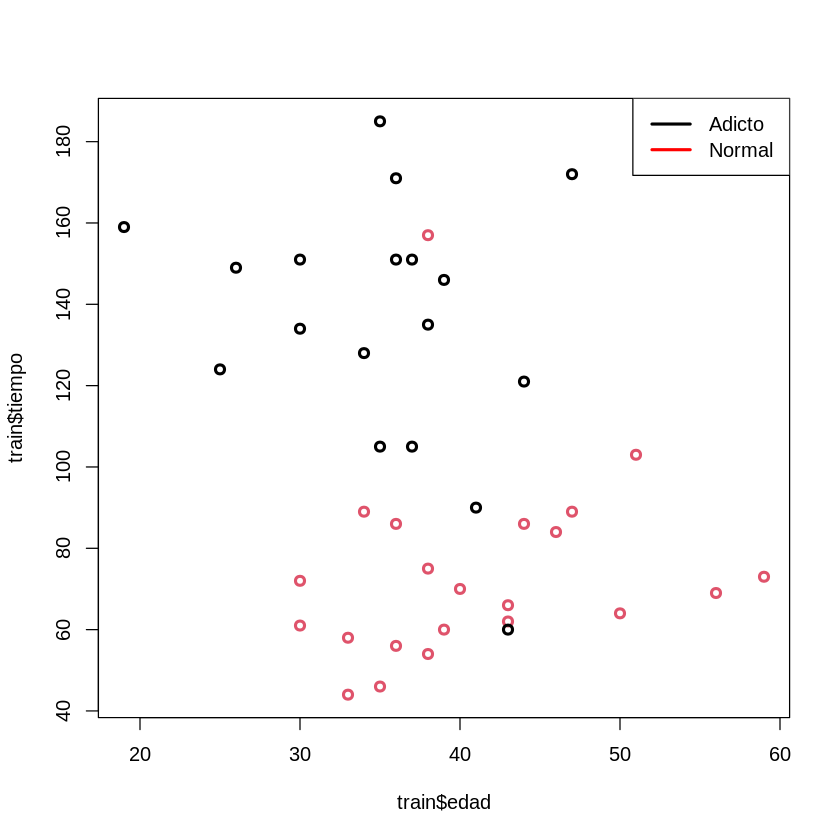

In [ ]:
plot(train$edad,train$tiempo,col = train$condicion ,lwd=2.5)
legend("topright",col = c("black","red"),legend = c("Adicto","Normal"),lwd = 2.5)


In [ ]:
tune.out=tune(svm,condicion~.,data=train,kernel="linear",ranges = list(cost=c(0.001,0.01,0.1,1.5,10,100)))
summary(tune.out)

bestmod=tune.out$best.model
summary(bestmod)



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.1 

- Detailed performance results:
     cost error dispersion
1   0.001 0.450  0.2838231
2   0.010 0.450  0.2838231
3   0.100 0.150  0.2108185
4   1.500 0.125  0.1767767
5  10.000 0.100  0.1290994
6 100.000 0.100  0.1290994



Call:
best.tune(method = svm, train.x = condicion ~ ., data = train, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1.5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  13

 ( 6 7 )


Number of Classes:  2 

Levels: 
 Adicto Normal




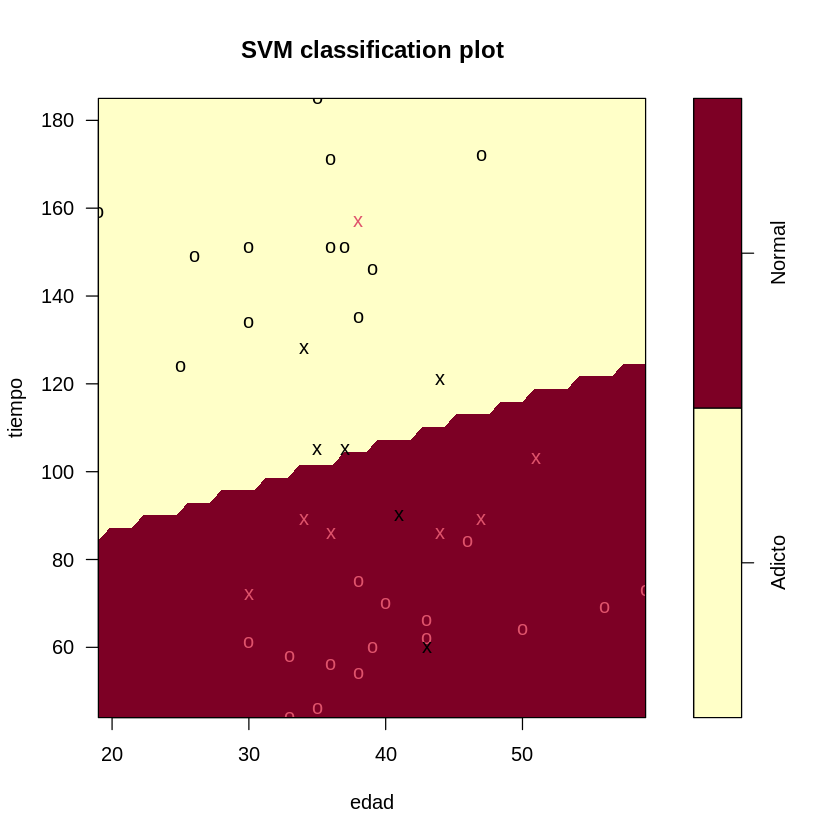

In [ ]:
plot(bestmod,train)

In [ ]:
condicionpred=predict(bestmod,test)
table(predict=condicionpred,truth=test$condicion)

        truth
predict  Adicto Normal
  Adicto      9      1
  Normal      5     15

In [ ]:
(9+15)

[1] 24

5. Utilizando prueba de hipótesis determine si hay evidencia de que el algoritmo tiene capacidad de clasificar a los usuarios

In [ ]:
binom.test(24,30,p=0.5,alternative = "greater",conf.level = 0.95)


	Exact binomial test

data:  24 and 30
number of successes = 24, number of trials = 30, p-value = 0.0007155
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.6429909 1.0000000
sample estimates:
probability of success 
                   0.8 
